#Exercise 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

## 1. Theoretical Question
Principal Component Analysis (PCA) is a technique for dimensionality reduction
that identifies the directions (principal components) of maximum variance in the data.
The steps are:
1. Standardization (Centering): Compute the mean of each feature and subtract it from the data points so that the dataset has zero mean. If features have vastly different scales, divide by the standard deviation.
2. Covariance Matrix: Compute the covariance matrix $C$ of the centered data matrix $X$ (where rows are samples). $C = \frac{1}{N-1}X^T X$.
3. Eigendecomposition: Find the eigenvalues and eigenvectors of the covariance matrix $C$.
4. Sorting: Sort the eigenvalues in descending order. The eigenvectors corresponding to the largest eigenvalues represent the directions of maximum variance.
5. Projection: Select the top $k$ eigenvectors to form a projection matrix $W$. Project the original data onto this subspace: $X_{new} = X W$.

Singular Value Decomposition (SVD) is often preferred for numerical stability.
* Decompose the centered data matrix $X$ directly: $X = U \Sigma V^T$.
* The eigenvectors of the covariance matrix ($X^T X$) are the columns of $V$ (Right Singular Vectors).
* The eigenvalues $\lambda_i$ of the covariance matrix are related to the singular values $\sigma_i$ by: $\lambda_i = \frac{\sigma_i^2}{N-1}$

If eigenvalues are $\lambda_1=6$ and $\lambda_2=2$:The data is spread out 3 times more (variance-wise) along the first principal component than the second.This forms an elliptical distribution.


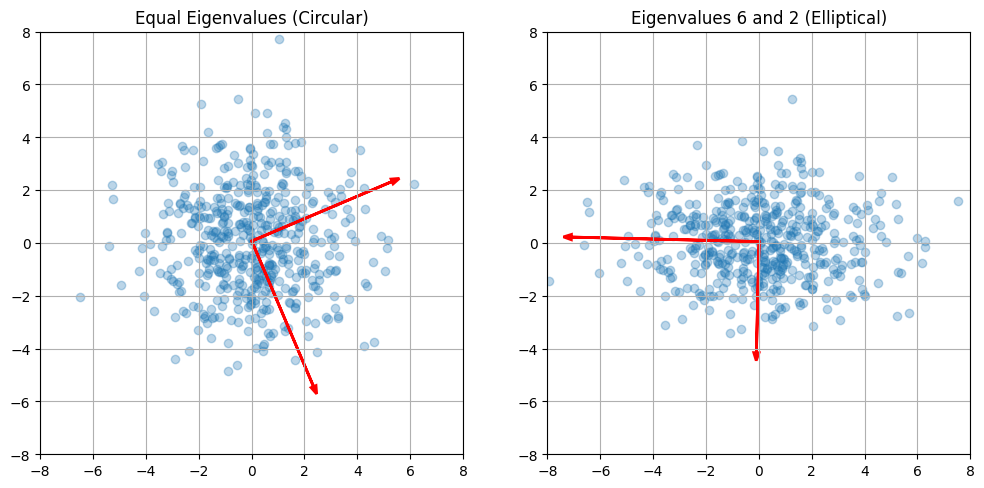

In [3]:
def plot_pca_distribution(eigenvalues, title, ax):
    # Create a random dataset with specified variance
    n_samples = 500

    # Create diagonal covariance matrix from eigenvalues
    cov_matrix = np.diag(eigenvalues)

    # Generate data
    rng = np.random.RandomState(42)
    X = rng.multivariate_normal([0, 0], cov_matrix, n_samples)

    # Perform PCA (just to get vectors for plotting)
    pca_mean = np.mean(X, axis=0)
    U, S, Vt = np.linalg.svd(X - pca_mean)
    components = Vt.T
    explained_variance = (S ** 2) / (n_samples - 1)

    # Scatter plot
    ax.scatter(X[:, 0], X[:, 1], alpha=0.3, label='Data points')

    # Plot Eigenvectors (scaled by sqrt of eigenvalue for visibility)
    # Factor 3 is just for visualization scaling
    for length, vector in zip(explained_variance, components.T):
        v = vector * 3 * np.sqrt(length)
        ax.arrow(pca_mean[0], pca_mean[1], v[0], v[1],
                 head_width=0.2, head_length=0.3, fc='r', ec='r', linewidth=2)

    ax.set_title(title)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.set_xlim(-8, 8)
    ax.set_ylim(-8, 8)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Case 1: Equal Eigenvalues
plot_pca_distribution([4, 4], "Equal Eigenvalues (Circular)", axes[0])

# Case 2: Eigenvalues 6 and 2
plot_pca_distribution([6, 2], "Eigenvalues 6 and 2 (Elliptical)", axes[1])

plt.show()

*Data Points:* $P_1 = (-1, 1)$$P_2 = (0, 0)$$P_3 = (1, 1)$
* *Step A:* Centering the Data - Compute mean $\mu$:$$\mu_x = (-1 + 0 + 1) / 3 = 0$$
$$\mu_y = (1 + 0 + 1) / 3 = 2/3$$
Mean vector $\mu = [0, 2/3]$.
Centered Data ($X_c$):
$$P_{c1} = (-1, 1-2/3) = (-1, 1/3)$$
$$P_{c2} = (0, 0-2/3) = (0, -2/3)$$
$$P_{c3} = (1, 1-2/3) = (1, 1/3)$$
* *Step B:* Covariance Matrix - $$Cov(x, x) = \frac{(-1)^2 + 0^2 + 1^2}{2} = \frac{2}{2} = 1$$
$$Cov(y, y) = \frac{(1/3)^2 + (-2/3)^2 + (1/3)^2}{2} = \frac{1/9 + 4/9 + 1/9}{2} = \frac{6/9}{2} = \frac{1}{3}$$
$$Cov(x, y) = \frac{(-1)(1/3) + (0)(-2/3) + (1)(1/3)}{2} = \frac{-1/3 + 0 + 1/3}{2} = 0$$. Covariance Matrix
$$C = \begin{bmatrix} 1 & 0 \\ 0 & 1/3 \end{bmatrix}$$.
* *Step C:* Principal Components - Since $C$ is diagonal, the eigenvectors are the canonical basis vectors. $\lambda_1 = 1$, Eigenvector $v_1 = [1, 0]^T$.$\lambda_2 = 1/3$, Eigenvector $v_2 = [0, 1]^T$.

* **Q1:** The first principal component is the vector $v_1 = [1, 0]^T$.
* **Q2:** Project centered points onto $[1, 0]$. This simply extracts the x-coordinate. $z_1 = -1$, $z_2 = 0$ and $z_3 = 1$. Coordinates: $[-1, 0, 1]$.
* **Q3:** Variance = $\frac{(-1)^2 + 0^2 + 1^2}{2} = 1$.(Matches the first eigenvalue).
* **Q4:** Reconstruction in centered space $\hat{X}_c = z \cdot v_1^T$.
$$\hat{P}_{c1} = -1 \cdot [1, 0] = (-1, 0)$$
$$\hat{P}_{c2} = 0 \cdot [1, 0] = (0, 0)$$
$$\hat{P}_{c3} = 1 \cdot [1, 0] = (1, 0)$$
Reconstruction in original space ($\hat{X} = \hat{X}_c + \mu$).
$$\hat{P}_{1} = (-1, 0) + (0, 2/3) = (-1, 2/3)$$
$$\hat{P}_{2} = (0, 0) + (0, 2/3) = (0, 2/3)$$
$$\hat{P}_{3} = (1, 0) + (0, 2/3) = (1, 2/3)$$
Squared Euclidean Distances (Error):
$$d_1^2 = \|(-1, 1) - (-1, 2/3)\|^2 = \|(0, 1/3)\|^2 = 1/9$$
$$d_2^2 = \|(0, 0) - (0, 2/3)\|^2 = \|(0, -2/3)\|^2 = 4/9$$
$$d_3^2 = \|(1, 1) - (1, 2/3)\|^2 = \|(0, 1/3)\|^2 = 1/9$$
Total Reconstruction Error (Sum of squared errors):
$$E = 1/9 + 4/9 + 1/9 = 6/9 = 2/3 \approx 0.667$$.

In [4]:
# Verification Code
X_points = np.array([[-1, 1], [0, 0], [1, 1]])

# 1. Centering
mean_vec = np.mean(X_points, axis=0)
X_centered = X_points - mean_vec

# 2. PCA via SVD
U, S, Vt = np.linalg.svd(X_centered)
v1 = Vt[0] # First PC

print(f"Mean Vector: {mean_vec}")
print(f"First Principal Component: {v1}")

# 3. Projection
z = X_centered @ v1
print(f"Projected Coordinates: {z}")

# 4. Reconstruction
X_rec_centered = np.outer(z, v1)
X_rec = X_rec_centered + mean_vec
print("Reconstructed Points:\n", X_rec)

# 5. Reconstruction Error
error = np.sum((X_points - X_rec)**2)
print(f"Total Reconstruction Error: {error:.4f} (Expected: 0.6667)")

Mean Vector: [0.         0.66666667]
First Principal Component: [1. 0.]
Projected Coordinates: [-1.  0.  1.]
Reconstructed Points:
 [[-1.          0.66666667]
 [ 0.          0.66666667]
 [ 1.          0.66666667]]
Total Reconstruction Error: 0.6667 (Expected: 0.6667)


#Exercise 2

1.
GD vs SGD
* Classical (Batch) GD: Computes the gradient using the entire dataset for every update step. It is stable and follows a straight path to the minimum but is computationally expensive for large $N$.
* Stochastic Gradient Descent (SGD): Uses a single random sample (or a small batch) to estimate the gradient and update parameters. It is much faster per iteration but introduces noise (variance) in the gradient estimate, causing the path to zig-zag toward the minimum.

SGD vs ADAGRAD
* SGD uses a fixed (or manually decayed) scalar learning rate $\eta$ for all parameters.
* ADAGRAD is an adaptive learning rate method. It scales the learning rate for each parameter individually based on the sum of squared historical gradients. Parameters with frequent large gradients get smaller learning rates, and sparse parameters get larger ones.

Applicability: Adagrad helps when data is sparse or when different features have different scaling sensitivities. In this small, dense dataset, simple SGD is sufficient, but Adagrad would likely converge faster by handling any feature scaling imbalance automatically.

2.

Loss Function: ${L}(\beta) = \sum (\beta^T x_i - y_i)^2$.
Gradient per sample $i$: $\nabla_{\beta} L_i = 2(\beta^T x_i - y_i) x_i$.


In [5]:
# Data setup
X_train = np.array([
    [1, 1, 2],
    [1, 2, 1],
    [1, 1, 1]
])
y_train = np.array([11, 10, 8])

beta = np.array([1.0, 1.0, 1.0]) # Float for precision
eta = 0.1
n_samples = X_train.shape[0]

print(f"Initial Beta: {beta}\n")

# SGD Loop
for epoch in range(1, 3): # 2 Epochs
    print(f"--- Epoch {epoch} ---")
    epoch_error_sum = 0

    for i in range(n_samples):
        xi = X_train[i]
        yi = y_train[i]

        # 1. Prediction
        y_pred = np.dot(beta, xi)

        # 2. Error (residual)
        error = y_pred - yi
        epoch_error_sum += error**2

        # 3. Gradient: 2 * error * x
        gradient = 2 * error * xi

        # 4. Update
        beta = beta - eta * gradient

        print(f"Sample {i+1}: Pred={y_pred:.2f}, y={yi}, Err={error:.2f}")
        print(f"  Grad={gradient}, New Beta={beta}")

    print(f"End of Epoch {epoch}. Total Loss (Sum of Squared Errors): {epoch_error_sum:.4f}\n")

print(f"Final Beta Parameters: {beta}")

Initial Beta: [1. 1. 1.]

--- Epoch 1 ---
Sample 1: Pred=4.00, y=11, Err=-7.00
  Grad=[-14. -14. -28.], New Beta=[2.4 2.4 3.8]
Sample 2: Pred=11.00, y=10, Err=1.00
  Grad=[2. 4. 2.], New Beta=[2.2 2.  3.6]
Sample 3: Pred=7.80, y=8, Err=-0.20
  Grad=[-0.4 -0.4 -0.4], New Beta=[2.24 2.04 3.64]
End of Epoch 1. Total Loss (Sum of Squared Errors): 50.0400

--- Epoch 2 ---
Sample 1: Pred=11.56, y=11, Err=0.56
  Grad=[1.12 1.12 2.24], New Beta=[2.128 1.928 3.416]
Sample 2: Pred=9.40, y=10, Err=-0.60
  Grad=[-1.2 -2.4 -1.2], New Beta=[2.248 2.168 3.536]
Sample 3: Pred=7.95, y=8, Err=-0.05
  Grad=[-0.096 -0.096 -0.096], New Beta=[2.2576 2.1776 3.5456]
End of Epoch 2. Total Loss (Sum of Squared Errors): 0.6759

Final Beta Parameters: [2.2576 2.1776 3.5456]


# Exercise 3

Neuron output: $y = \sigma(z_{in})$ where $z_{in} = wx + b$ and $\sigma(t) = \frac{1}{1+e^{-t}}$.

Target: $z$.

Cost function: $J(w, b) = \frac{1}{2}(y - z)^2$.

1. Computing the Gradient $\nabla J(w,b)$. We apply the chain rule. $$\nabla J = \begin{bmatrix} \frac{\partial J}{\partial w} \\ \frac{\partial J}{\partial b} \end{bmatrix}$$

Step A: Derivative of Loss w.r.t to output
$$\frac{\partial J}{\partial y} = (y - z)$$

Step B: Derivative of output w.r.t  $z_{in} = wx+b$. The derivative of the sigmoid function $\sigma(t)$ is $\sigma(t)(1-\sigma(t))$.$$\frac{\partial y}{\partial z_{in}} = y(1 - y)$$

Step C: Derivative of $z_{in}$ w.r.t parameters $$\frac{\partial z_{in}}{\partial w} = x, \quad \frac{\partial z_{in}}{\partial b} = 1$$

Step D: Combine (Chain Rule)
$$\frac{\partial J}{\partial w} = \frac{\partial J}{\partial y} \cdot \frac{\partial y}{\partial z_{in}} \cdot \frac{\partial z_{in}}{\partial w} = (y-z) \cdot y(1-y) \cdot x$$
$$\frac{\partial J}{\partial b} = \frac{\partial J}{\partial y} \cdot \frac{\partial y}{\partial z_{in}} \cdot \frac{\partial z_{in}}{\partial b} = (y-z) \cdot y(1-y) \cdot 1$$
Thus:$$\nabla J(w,b) = (y-z)y(1-y) \begin{bmatrix} x \\ 1 \end{bmatrix}$$

2. We need to show: $||\nabla J||< \frac{1}{4}\sqrt{1+x^2}(1+|z|)$.

Calculate Norm Squared:
$$||\nabla J||^2 = \left( \frac{\partial J}{\partial w} \right)^2 + \left( \frac{\partial J}{\partial b} \right)^2$$
$$||\nabla J||^2 = [(y-z)y(1-y)x]^2 + [(y-z)y(1-y)]^2$$
$$||\nabla J||^2 = [(y-z)y(1-y)]^2 (x^2 + 1)$$

Take Square Root:
$$||\nabla J|| = |(y-z)y(1-y)| \sqrt{1+x^2}$$
$$||\nabla J|| = |y-z| \cdot |y(1-y)| \cdot \sqrt{1+x^2}$$

The maximum value of $f(y) = y(1-y)$ for $y \in (0, 1)$ occurs at $y=0.5$, where $f(0.5) = 0.25 = 1/4$ hence
$$|y(1-y)| \le \frac{1}{4}$$

By triangle inequality $|a - b| \le |a| + |b|$ hence
$$|y - z| \le |y| + |z|$$
Since $y$ is the output of a sigmoid, $0 < y < 1$, so $|y| < 1$ and
$$|y - z| < 1 + |z|$$

Substituting these bounds back into the norm equation we have
$$||\nabla J|| < (1+|z|) \cdot \frac{1}{4} \cdot \sqrt{1+x^2}$$
$$||\nabla J|| < \frac{1}{4}\sqrt{1+x^2}(1+|z|)$$

3. The update rule for gradient descent with step size $\alpha$is
$$w_{n+1} = w_n - \alpha \frac{\partial J}{\partial w} = w_n - \alpha (y_n-z)y_n(1-y_n)x$$
$$b_{n+1} = b_n - \alpha \frac{\partial J}{\partial b} = b_n - \alpha (y_n-z)y_n(1-y_n)$$Where $y_n = \sigma(w_n x + b_n)$.